Determine the ratio below which a traffic jam occurs on A roads. This is useful when translating the government definition of a traffic jam for roads with lower speed limits.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data_loading import *

In [2]:
df = pd.read_csv("/Users/teun/Downloads/all_fcd_metadata.csv",
                 usecols=['measurementSiteReference',
                          'measurementTimeDefault',
                          'speed', 
                          'travelTime',
                          'travelTimeReference', 
                          'lengthAffected',
                          'lengthAffectedTotal',
                          'measurementSiteName',
                          'measurementSiteNumberOfLanes'])

In [3]:
df.head()

measurementSiteReference measurementTimeDefault       speed  \
0                          RWS04_R_RWSTR58    2019-06-13 14:28:00   13.680622   
1                          RWS04_R_RWSTR80    2019-06-13 14:28:00  104.411177   
2                         RWS04_R_RWSTR557    2019-06-13 14:28:00   98.881200   
3  RWS08_032_HRR_oprit_Heerenveen_Zuid_10b    2019-06-13 14:28:00   57.624948   
4                PGL03_Graaf_Alardsingel-1    2019-06-13 14:28:00   18.425079   

   travelTime  travelTimeReference lengthAffected  lengthAffectedTotal  \
0     414.718               56.788       [1576.0]               1576.0   
1      65.062               52.253       [1887.0]               1887.0   
2      32.803               24.950        [901.0]                901.0   
3      26.551               17.386        [425.0]                425.0   
4      71.902               26.495        [368.0]                368.0   

                            measurementSiteName  measurementSiteNumberOfLanes  
0                         R_RWS_4291-R_RWS_4289                             1  
1                         R_RWS_0103-R_RWS_0104                             1  
2                         R_RWS_0531-R_RWS_0532                             1  
3             032_HRR_oprit Heerenveen Zuid_10b                             1  
4  Prins Mauritssingel-Margaretha v Mechelenweg                             1

In [4]:
get_no_of_unique_values(df)

{'lengthAffected': 5482,
 'lengthAffectedTotal': 4682,
 'measurementSiteName': 28122,
 'measurementSiteNumberOfLanes': 7,
 'measurementSiteReference': 32206,
 'measurementTimeDefault': 3,
 'speed': 27298,
 'travelTime': 21572,
 'travelTimeReference': 15732}


In [5]:
# Filter out non-sensical speed measurements.
df_filter = df[(df["speed"] < 130) & (df["speed"] > 0)]

# Convert to m/s.
df_filter["speed"] = df_filter["speed"] / 3.6

# Calculate reference speed.
df_filter["referenceSpeed"] = df["lengthAffectedTotal"] / df["travelTimeReference"]

# Filter out slower roads (below 100 kp/h). 
df_filter = df_filter[df_filter["referenceSpeed"] > 100 / 3.6]

df_filter["ratioReference"] = df_filter["speed"] / df_filter["referenceSpeed"]

df_filter.shape

/usr/local/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(3079, 11)

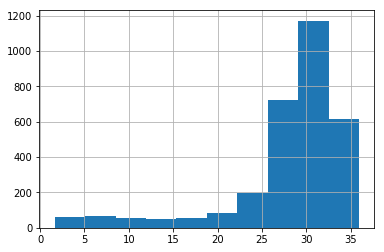

In [6]:
df_filter["speed"].hist()

In [7]:
# Apply the government definition of a jam.
df_jams = df_filter[df_filter["speed"] < 50/3.6]

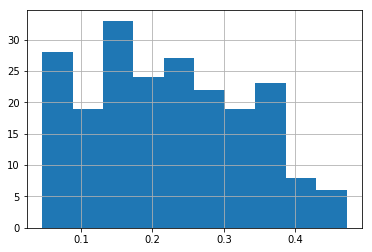

In [8]:
df_jams["ratioReference"].hist()

In [9]:
df_jams["ratioReference"].max()

0.4718992073649598